In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.metrics import mean_squared_error
import seaborn as sns

rc('font', size=16)

### Global functions

In [85]:
def load_results(path, folds, f_ids, n_test, model_name): # n_test = number of test stations
    pred_y = np.zeros((len(folds), len(f_ids), n_test))#*np.nan
    test_y = np.zeros((len(folds), len(f_ids), n_test))#*np.nan
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            try:
                pred_y[fold_id, file_id, :] = np.load(path+'results/'+model_name+'/fold_'+fold+'/'+file+'.npy').ravel()
                test_y[fold_id, file_id, :] = np.load(path+'data/fold_'+fold+'/test/y/'+file+'.npy').ravel()
            except:
                print(model,fold_id,file,'not found')
    return pred_y, test_y

def fold_wise_rmse(pred_y, test_y, n_folds): # 2D RMSE per fold
    rmse = []
    for i in range(n_folds):
        tmp = mean_squared_error(test_y[i,:,:].ravel(), pred_y[i,:,:].ravel(), squared=False)
#         print('Fold',i,'RMSE:',round(tmp, 3))
        rmse.append(tmp)
    return rmse
        
def plot_pred_vs_test(pred_y, test_y, n_folds):
    fig, ax = plt.subplots(1, n_folds, sharex=True, sharey=True, figsize=(15,3))
    for i in range(n_folds):
        ax[i].plot(test_y[i,:,:].ravel(), test_y[i,:,:].ravel())
        ax[i].scatter(test_y[i,:,:].ravel(), pred_y[i,:,:].ravel())
    ax[0].set_xlabel('Ground truth');
    ax[0].set_ylabel('Predicted values');

# Global config

In [86]:
f_ids = [str(i).zfill(5) for i in range(277)]
folds = [str(i) for i in range(6)]
n_test = 6

## beijing-pm2.5-quadratic interpolated met data

In [87]:
path = '../production/pm25_beijing_best36/quadratic/'

### All models

elst 1 00061 not found
elst 1 00126 not found


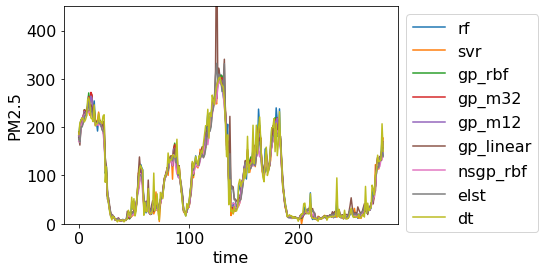

In [123]:
models = ['rf','svr', 'gp_rbf', 'gp_m32', 'gp_m12', 'gp_linear','nsgp_rbf','elst','dt']
# models = ['gp_rbf', 'nsgp_rbf']
res = pd.DataFrame(index=models, columns=['fold_'+str(i) for i in range(len(folds))]+['avg'])
for model in models:
    pred_y, test_y = load_results(path, folds, f_ids, n_test, model)
    plt.plot(pred_y[0,:,0], label=model)
#     plt.plot(test_y[0,:,0])
#     plot_pred_vs_test(pred_y, test_y, len(folds))
#     plt.figure()
#     plt.plot(test_y[0,:,0])
#     plt.plot(pred_y[0,:,0])
    fold_rmse = fold_wise_rmse(pred_y, test_y, len(folds))
    fold_rmse.append(np.mean(fold_rmse))
    res.loc[model, :] = fold_rmse
plt.ylim(0,450);
plt.xlabel('time')
plt.ylabel('PM2.5')
plt.legend(bbox_to_anchor=[1,1]);

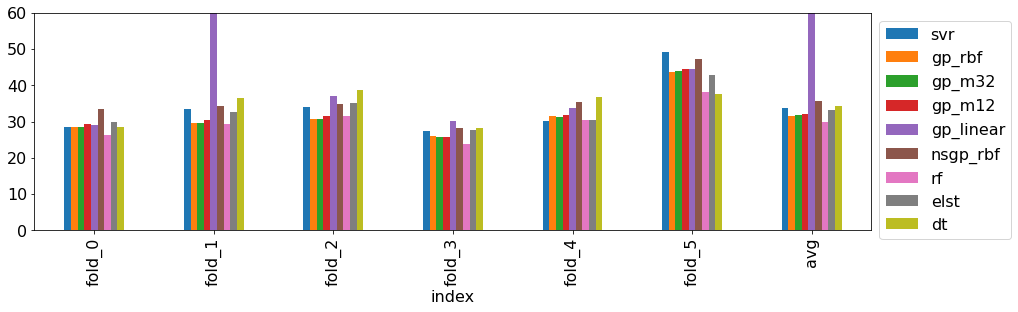

In [89]:
fig,ax = plt.subplots(figsize=(15,4))
res.T.reset_index().plot(x='index',y=res.T.columns,kind='bar',ax=ax)
plt.ylim(0,60);
plt.legend(bbox_to_anchor=[1,1]);

## Most frequant hyperparameters

### SVR

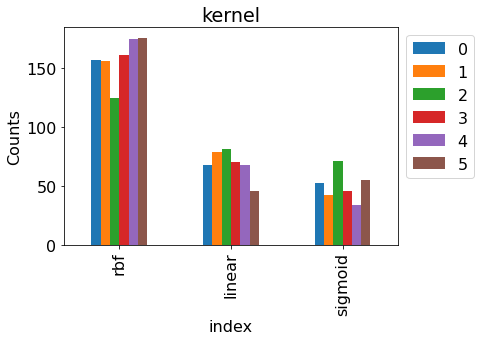

In [46]:
c = ['g','k','b','y','r','c']
hyp = 'kernel'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/svr/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

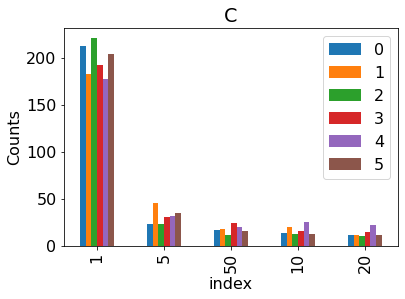

In [47]:
c = ['g','k','b','y','r','c']
hyp = 'C'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/svr/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

### Random forest

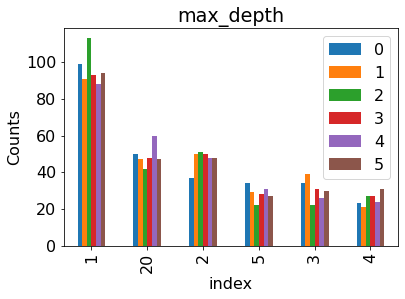

In [48]:
c = ['g','k','b','y','r','c']
hyp = 'max_depth'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/rf/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

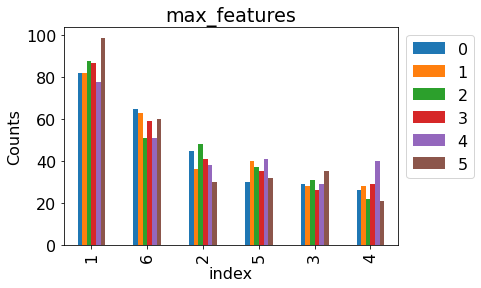

In [49]:
c = ['g','k','b','y','r','c']
hyp = 'max_features'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/rf/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

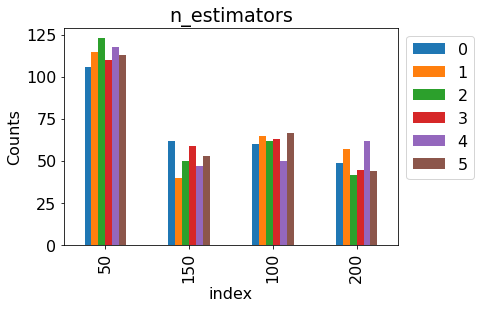

In [50]:
c = ['g','k','b','y','r','c']
hyp = 'n_estimators'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/rf/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

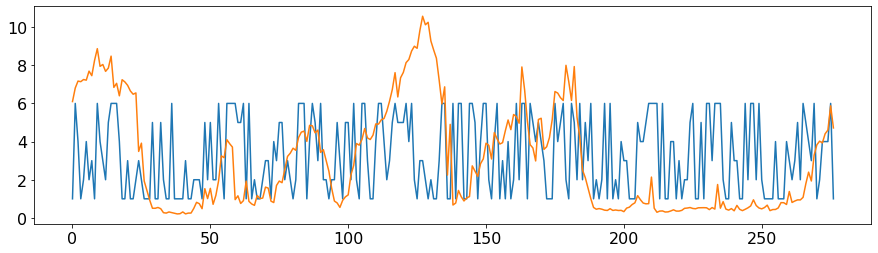

In [83]:
c = ['g','k','b','y','r','c']
hyp = 'max_features'
res_df = pd.DataFrame(columns=range(len(folds)))
plt.figure(figsize=(15,4))
for fold in range(len(folds)):
    fwise = []
    preds = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/rf/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        pred_y = np.load(path+'results/rf/fold_'+str(fold)+'/'+file+'.npy')[0]
        fwise.append(val)
        preds.append(pred_y/30)
    plt.plot(fwise)
    plt.plot(preds)
    break

### Decision tree

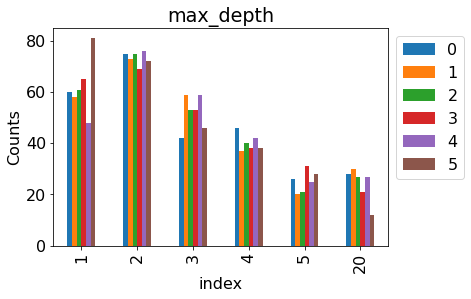

In [91]:
c = ['g','k','b','y','r','c']
hyp = 'max_depth'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        val = pd.read_pickle(path+'results/dt/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        fwise.append(val)
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.sort_index().reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

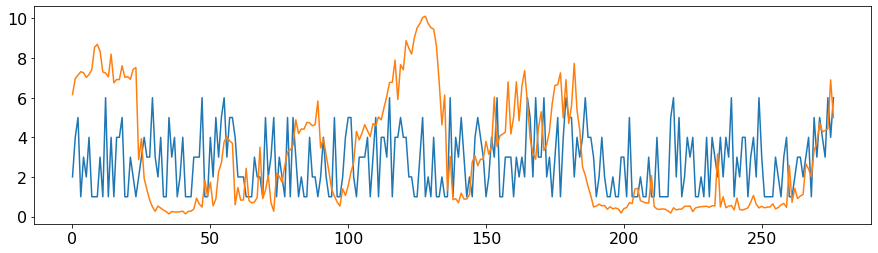

In [118]:
c = ['g','k','b','y','r','c']
hyp = 'max_features'
res_df = pd.DataFrame(columns=range(len(folds)))
plt.figure(figsize=(15,4))
for fold in range(len(folds)):
    fwise = []
    preds = []
    for file in f_ids:
        if file=='00175':
            m_test = pd.read_pickle(path+'results/dt/fold_'+str(fold)+'/'+file+'.model')
        val = pd.read_pickle(path+'results/dt/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
        pred_y = np.load(path+'results/dt/fold_'+str(fold)+'/'+file+'.npy')[0]
#         print(file,pred_y)
        fwise.append(val)
        preds.append(pred_y/30)
    plt.plot(fwise)
    plt.plot(preds)
    break

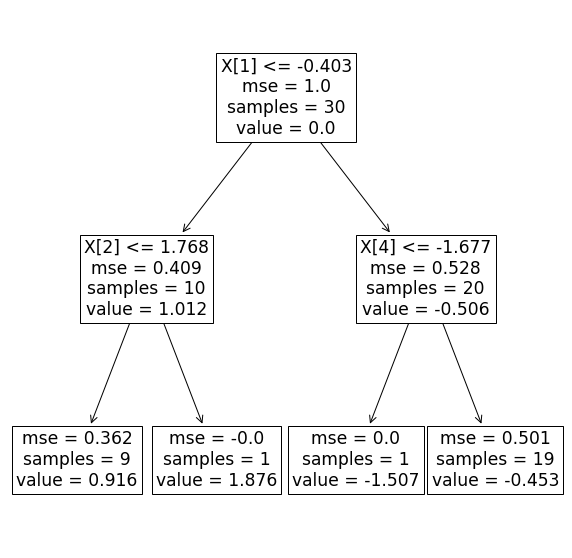

In [119]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(10,10))
plot_tree(m_test.best_estimator_, ax=ax);

### Elastic net

1 00061 not found
1 00126 not found


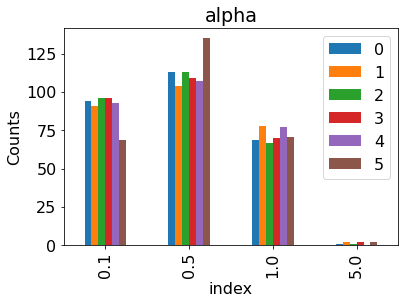

In [66]:
c = ['g','k','b','y','r','c']
hyp = 'alpha'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        try:
            val = pd.read_pickle(path+'results/elst/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
            fwise.append(val)
        except:
            print(fold,file,'not found')
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.sort_index().reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);

1 00061 not found
1 00126 not found


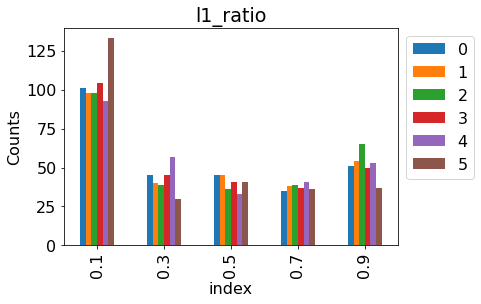

In [67]:
c = ['g','k','b','y','r','c']
hyp = 'l1_ratio'
res_df = pd.DataFrame(columns=range(len(folds)))
for fold in range(len(folds)):
    fwise = []
    for file in f_ids:
        try:
            val = pd.read_pickle(path+'results/elst/fold_'+str(fold)+'/'+file+'.model').best_params_[hyp]
            fwise.append(val)
        except:
            print(fold,file,'not found')
    res_df[fold] = pd.Series(fwise).value_counts()#.plot(kind='bar', alpha=0.2, color=c[fold])
res_df = res_df.sort_index().reset_index()
res_df.plot(x='index', y=res_df.columns[1:], kind='bar')
plt.ylabel('Counts');
plt.title(hyp)
plt.legend(bbox_to_anchor=[1,1]);